In [ ]:
# Librerías julian 
library(readxl)
library(readxl)
library(dplyr)
library(car)
library(explore)
library(psych)
library(corrplot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘psych’


The following object is masked from ‘package:explore’:

    describe


The following object is masked from ‘package:car’:

    logit


corrplot 0.92 loaded



In [ ]:
# Leer datos
ruta <- "InsureCO.xlsx"
data <- read_excel(ruta)
#perros

# Exploración Inicial

In [3]:
# Exploración inicial
head(data)


age,sex,bmi,children,smoker,region,charges
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


In [5]:
dim(data)

[1] 1338    7

In [6]:
colnames(data)

[1] "age"      "sex"      "bmi"      "children" "smoker"   "region"   "charges"

In [7]:
str(data)

tibble [1,338 × 7] (S3: tbl_df/tbl/data.frame)
 $ age     : num [1:1338] 19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr [1:1338] "female" "male" "male" "male" ...
 $ bmi     : num [1:1338] 27.9 33.8 33 22.7 28.9 ...
 $ children: num [1:1338] 0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr [1:1338] "yes" "no" "no" "no" ...
 $ region  : chr [1:1338] "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num [1:1338] 16885 1726 4449 21984 3867 ...


In [8]:
summary(data)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

In [9]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,1338,39.207025,1.404996e+01,39.000,39.00560,17.791200,18.000,64.00,46.00,0.05554775,-1.24754314,0.38410242
sex*,2,1338,1.505232,5.001596e-01,2.000,1.50653,0.000000,1.000,2.00,1.00,-0.02090444,-2.00105689,0.01367353
bmi,3,1338,30.663397,6.098187e+00,30.400,30.50021,6.197268,15.960,53.13,37.17,0.28341055,-0.05942352,0.16671423
children,4,1338,1.094918,1.205493e+00,1.000,0.93750,1.482600,0.000,5.00,5.00,0.93627750,0.19244011,0.03295616
smoker*,5,1338,1.204783,4.036940e-01,1.000,1.13153,0.000000,1.000,2.00,1.00,1.46148357,0.13603757,0.01103632
region*,6,1338,2.515695,1.104885e+00,3.000,2.51959,1.482600,1.000,4.00,3.00,-0.03801512,-1.32972605,0.03020571
charges,7,1338,13270.422265,1.211001e+04,9382.033,11076.01952,7440.809314,1121.874,63770.43,62648.55,1.51248252,1.58895424,331.06745432


# 1. Describir la variable edad del tomador de la póliza de seguro de vida a través de algunas medidas de tendencia central y dispersión.

In [25]:
summary(data$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   27.00   39.00   39.21   51.00   64.00 

In [19]:
mean(data$age)
median(data$age)

[1] 39.20703

[1] 39

In [21]:
tabla <- table(data$age)
tabla
prop.table(tabla)


18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 
69 68 29 28 28 28 28 28 28 28 28 27 27 27 26 26 26 25 25 25 25 25 27 27 27 27 
44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 
27 29 29 29 29 28 29 29 29 28 28 26 26 26 25 25 23 23 23 23 22 


        18         19         20         21         22         23         24 
0.05156951 0.05082212 0.02167414 0.02092676 0.02092676 0.02092676 0.02092676 
        25         26         27         28         29         30         31 
0.02092676 0.02092676 0.02092676 0.02092676 0.02017937 0.02017937 0.02017937 
        32         33         34         35         36         37         38 
0.01943199 0.01943199 0.01943199 0.01868460 0.01868460 0.01868460 0.01868460 
        39         40         41         42         43         44         45 
0.01868460 0.02017937 0.02017937 0.02017937 0.02017937 0.02017937 0.02167414 
        46         47         48         49         50         51         52 
0.02167414 0.02167414 0.02167414 0.02092676 0.02167414 0.02167414 0.02167414 
        53         54         55         56         57         58         59 
0.02092676 0.02092676 0.01943199 0.01943199 0.01943199 0.01868460 0.01868460 
        60         61         62         63         64 
0.01718

In [22]:
quantile(data$age, prob = c(0.25, 0.5, 0.75))

25% 50% 75% 
 27  39  51

## Medidas de dispersión

In [27]:
var(data$age)
sd(data$age)

[1] 197.4014

[1] 14.04996

In [29]:
# Coeficiente de variación
sd(data$age)/mean(data$age)

[1] 0.3583531

In [ ]:
# Coeficiente de simetría (skewness)
skew(data$age)

[1] 0.05554775

In [ ]:
# Coeficiente de curtosis (kurtosis)
kurtosi(data$age)

[1] -1.247543

La distribución tiene una baja concentración alrededor de la media (platicúrtica)

La distribución tiene una asimetría positiva

In [24]:
describe(data$age)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,1338,39.20703,14.04996,39,39.0056,17.7912,18,64,46,0.05554775,-1.247543,0.3841024


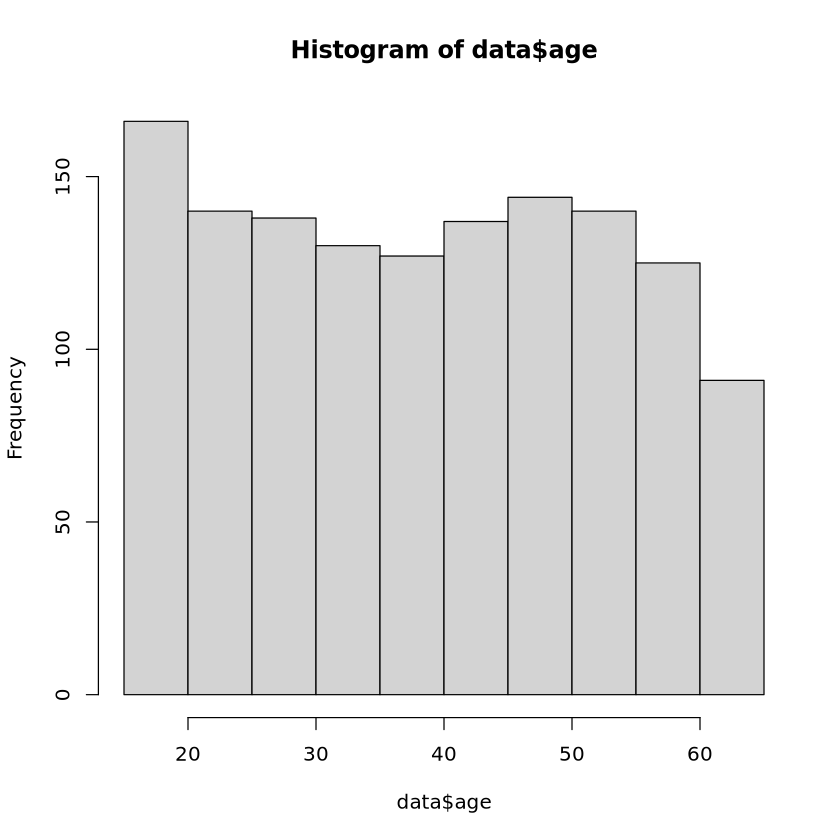

In [ ]:
hist(data$age)  #Histograma de frecuencias

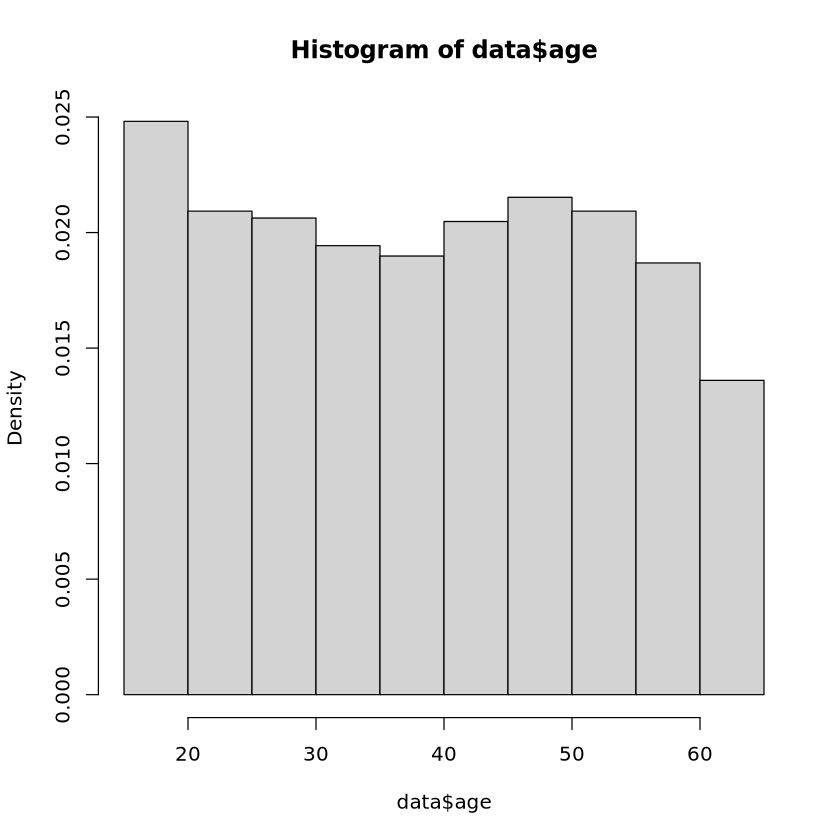

In [33]:
hist(data$age, freq = FALSE) #Densidades de probabilidad

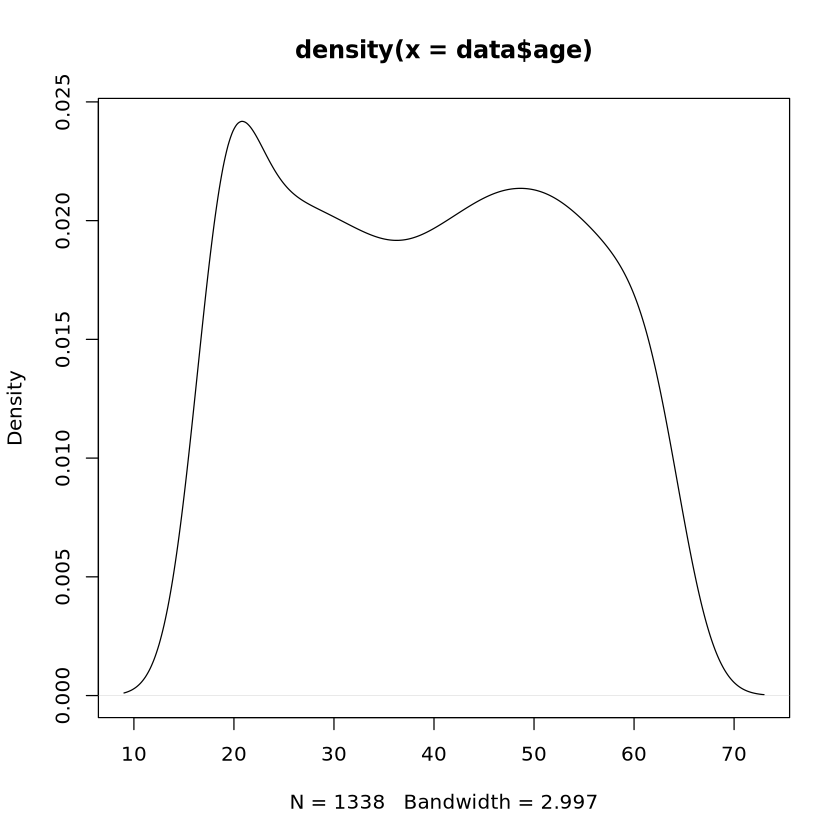

In [ ]:
plot(density(data$age)) #Grafico de densidades

[1] 63 95

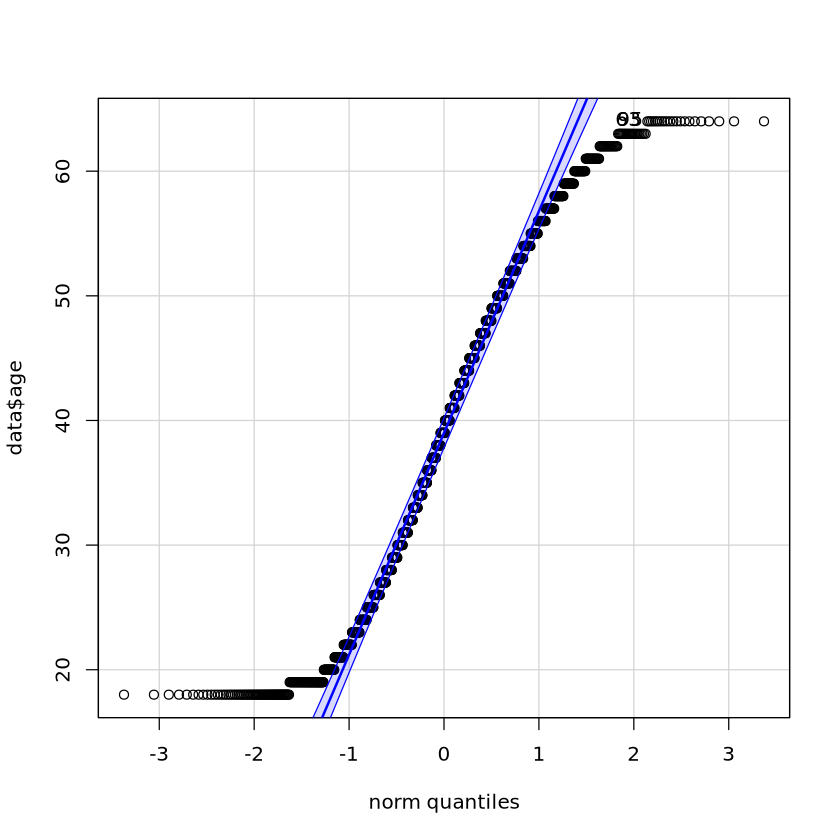

In [ ]:
qqPlot(data$age) #Gráfico Q-Q

Este tipo de gráfico permite comparar la distribución de probabilidad de los datos con una distribución teórica, si estas coinciden, se espera ver una linea recta. La función qqPlot permite comparar una serie de datos con la distribución normal.

In [39]:
shapiro.test(data$age)


	Shapiro-Wilk normality test

data:  data$age
W = 0.9447, p-value < 2.2e-16


In [40]:
ks.test(data$age, "pnorm", mean(data$age), sd(data$age))

Warning message in ks.test.default(data$age, "pnorm", mean(data$age), sd(data$age)):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data$age
D = 0.078945, p-value = 1.143e-07
alternative hypothesis: two-sided


numeric(0)

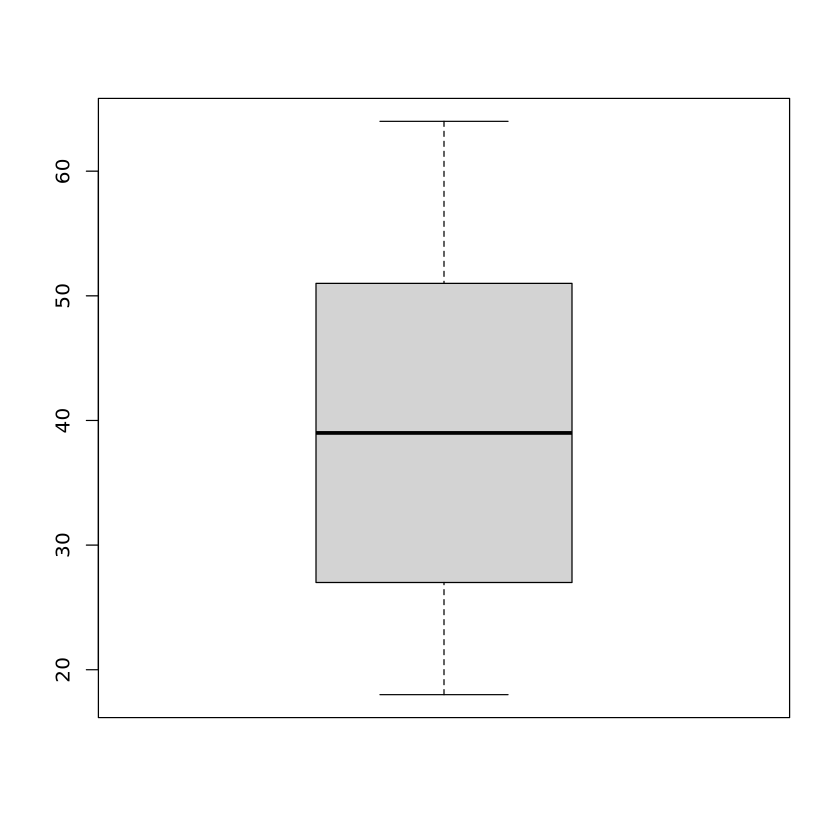

In [13]:
boxplot(data$age)$out

# 2. Caracterizar la relación que pueda existir entre los hábitos de consumo de cigarrillos y la región de residencia por medio de una tabla de contingencia.

In [41]:
head(data)

age,sex,bmi,children,smoker,region,charges
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


In [44]:
contingencia <- table(data$smoker, data$region)
contingencia

     
      northeast northwest southeast southwest
  no        257       267       273       267
  yes        67        58        91        58

In [45]:
addmargins(contingencia)

,northeast,northwest,southeast,southwest,Sum
no,257,267,273,267,1064
yes,67,58,91,58,274
Sum,324,325,364,325,1338


In [46]:
prop.table(contingencia, margin = 2) * 100


     
      northeast northwest southeast southwest
  no   79.32099  82.15385  75.00000  82.15385
  yes  20.67901  17.84615  25.00000  17.84615


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




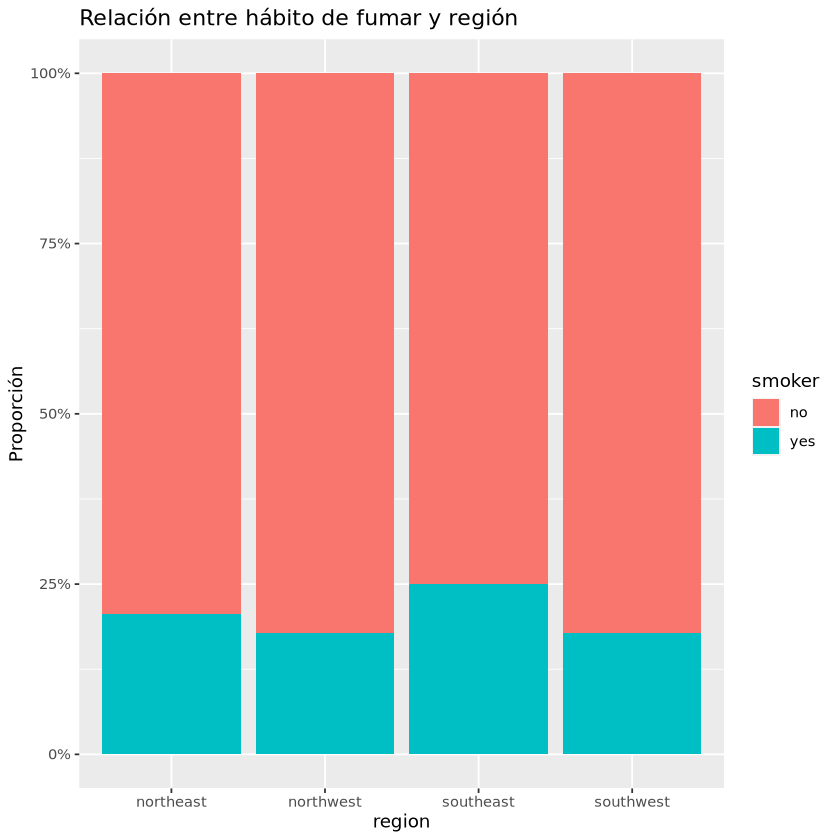

In [47]:
library(ggplot2)

ggplot(data, aes(x = region, fill = smoker)) +
  geom_bar(position = "fill") +
  labs(y = "Proporción", title = "Relación entre hábito de fumar y región") +
  scale_y_continuous(labels = scales::percent)


# 3. Identificar la conexión que pueda estarse dando entre el índice de masa corporal y el costo de la póliza por medio de un diagrama de dispersión y el coeficiente de correlación.

In [48]:
head(data)

age,sex,bmi,children,smoker,region,charges
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


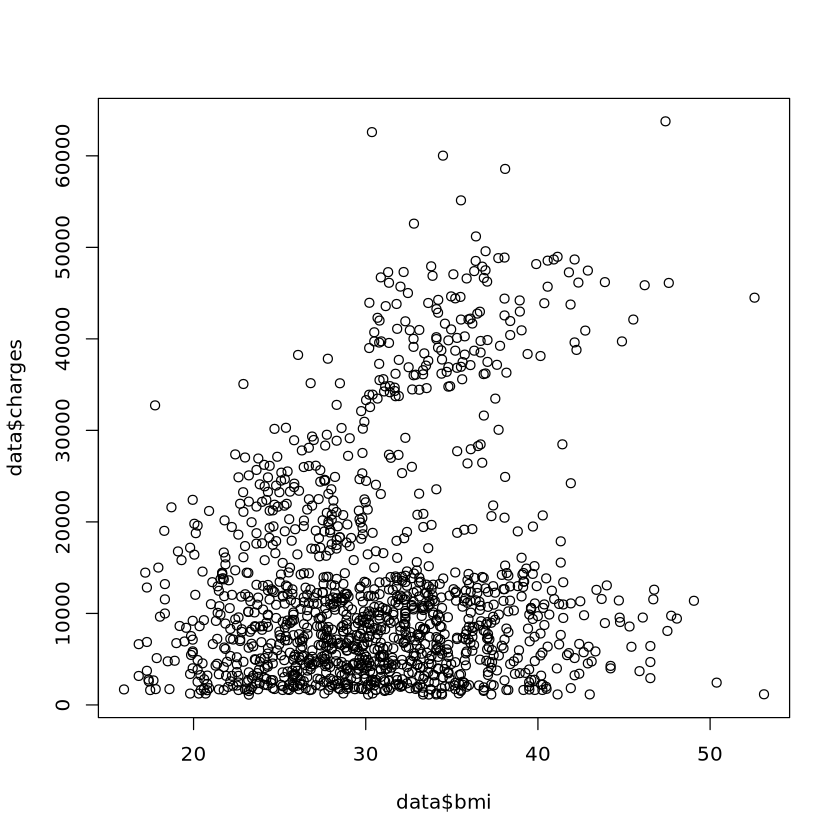

In [49]:
plot(data$bmi,data$charges) #Gráfico de dispersión

In [52]:
df <- data[, -c(2, 5, 6)]
head(df)

age,bmi,children,charges
<dbl>,<dbl>,<dbl>,<dbl>
19,27.900,0,16884.924
18,33.770,1,1725.552
28,33.000,3,4449.462
33,22.705,0,21984.471
32,28.880,0,3866.855
31,25.740,0,3756.622


In [54]:
cor(df)

,age,bmi,children,charges
age,1.0000000,0.1092719,0.04246900,0.29900819
bmi,0.1092719,1.0000000,0.01275890,0.19834097
children,0.0424690,0.0127589,1.00000000,0.06799823
charges,0.2990082,0.1983410,0.06799823,1.00000000


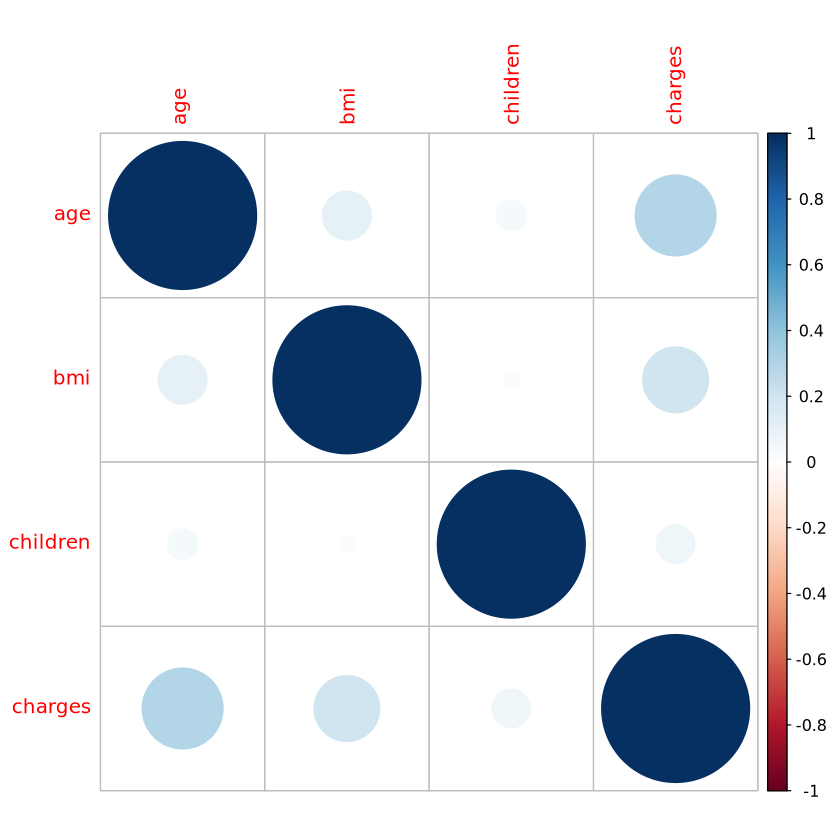

In [53]:
cor_data <- cor(df)
corrplot(cor_data)